# Assignment 1 — Colab Workflow (GitHub + Pre-commit + Submission Validation)

This notebook teaches the standard workflow used throughout the course:

1. Clone your team repo
2. Install dependencies
3. Install **pre-commit** and enable a hook to strip notebook outputs
4. Run this notebook end-to-end
5. Validate `predictions.csv`
6. Commit + push + tag


In [2]:
# (Colab) show python and system info
import sys, platform
print(sys.version)
print(platform.platform())


3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Linux-6.6.105+-x86_64-with-glibc2.35


## 1) Clone Repo

Login to your personal Github account, and make a fork of: https://github.com/TLKline/AIHC-5010-Winter-2026

Follow setup directions for working with a PAT in GitHub (30-second guide):

* Go to GitHub → Settings
* Developer settings
* Personal access tokens
* Choose:
  * Fine-Grained

You can clone using HTTPS.

Repo HTTPS URL (e.g., `https://github.com/TLKline/AIHC-5010-Winter-2026.git`)

In [3]:
# TODO: Change the following to your github repo path
repo_path = 'https://github.com/TLKline/AIHC-5010-Winter-2026.git'
!git clone {repo_path} student_repo

Cloning into 'student_repo'...
remote: Enumerating objects: 349, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 349 (delta 31), reused 30 (delta 26), pack-reused 309 (from 2)
Receiving objects: 100% (349/349), 9.71 MiB | 3.54 MiB/s, done.
Resolving deltas: 100% (158/158), done.


In [4]:
# Move into repo
%cd student_repo

# Repo git info
!git status

# Where are we?
print('----------')
print('We are at:')
!pwd


/content/student_repo
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
----------
We are at:
/content/student_repo


## 2) Install dependencies

This installs whatever is in `requirements.txt`.


In [5]:
!pip -q install -r Project-1/readmit30/requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.4/226.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 103.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.6 MB/s eta 0:00:00


## 3) Enable pre-commit hook to strip notebook outputs

This prevents giant notebooks and reduces merge/diff pain.

One-time per clone:
- `pre-commit install`

After that, every `git commit` will strip outputs from `*.ipynb`.


In [6]:
!pip -q install pre-commit
!pre-commit install


pre-commit installed at .git/hooks/pre-commit


#MAINSTART

**Assignment EDA: Task one: Data Snapshot:**

In [7]:
import numpy as np
import pandas as pd

from pathlib import Path
cands = list(Path(".").rglob("*train*.csv"))
if len(cands) == 0:
    raise FileNotFoundError("Couldn't find a train CSV. Search your repo for train/dev/test file names and update the pattern.")
train_path = sorted(cands, key=lambda p: len(str(p)))[0]
df = pd.read_csv(train_path)

df = df.replace(["?", "NA", "N/A", "null", "None", ""], np.nan)

outcome_col = "readmit30"
if outcome_col not in df.columns:
    raise ValueError(f"Expected '{outcome_col}' not found. Columns include: {list(df.columns)[:30]} ...")

rows, cols = df.shape
readmit_rate = df[outcome_col].mean()

num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.columns.difference(num_cols)

print("Train file:", train_path)
print(f"Rows x Columns: {rows} x {cols}")
print("Outcome column:", outcome_col)
print(f"Overall readmission rate: {readmit_rate:.4f} ({readmit_rate*100:.2f}%)")
print(f"Numeric columns: {len(num_cols)}")
print(f"Categorical/non-numeric columns: {len(cat_cols)}")

df.head()


Train file: Project-1/readmit30/scripts/data/public/train.csv
Rows x Columns: 65003 x 51
Outcome column: readmit30
Overall readmission rate: 0.1116 (11.16%)
Numeric columns: 15
Categorical/non-numeric columns: 36


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,row_id,readmit30
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,2278392,0
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,149190,0
2,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,16680,0
3,35754,82637451,Caucasian,Male,[50-60),NaN,2,1,2,3,...,Steady,No,No,No,No,No,No,Yes,35754,0
4,63768,114882984,Caucasian,Male,[70-80),NaN,1,1,7,5,...,No,No,No,No,No,No,No,Yes,63768,0


In [8]:

for col in df.columns:
    s = df[col]
    print("\n" + "="*60)
    print(f"Column: {col}")
    print(f"dtype: {s.dtype}")
    print(f"missing: {s.isna().sum()} / {len(s)}")

    # show a few raw values (including NaN)
    print("sample values:", list(s.head(10).values))

    # show distribution glimpse
    if pd.api.types.is_numeric_dtype(s):
        print("numeric summary:")
        print(s.describe())
    else:
        print("top categories:")
        print(s.value_counts(dropna=False).head(10))



Column: encounter_id
dtype: int64
missing: 0 / 65003
sample values: [np.int64(2278392), np.int64(149190), np.int64(16680), np.int64(35754), np.int64(63768), np.int64(12522), np.int64(15738), np.int64(28236), np.int64(36900), np.int64(40926)]
numeric summary:
count    6.500300e+04
mean     1.652766e+08
std      1.025533e+08
min      1.252200e+04
25%      8.549013e+07
50%      1.524313e+08
75%      2.302720e+08
max      4.438672e+08
Name: encounter_id, dtype: float64

Column: patient_nbr
dtype: int64
missing: 0 / 65003
sample values: [np.int64(8222157), np.int64(55629189), np.int64(42519267), np.int64(82637451), np.int64(114882984), np.int64(48330783), np.int64(63555939), np.int64(89869032), np.int64(77391171), np.int64(85504905)]
numeric summary:
count    6.500300e+04
mean     5.440774e+07
std      3.867605e+07
min      7.290000e+02
25%      2.343626e+07
50%      4.551559e+07
75%      8.771662e+07
max      1.894815e+08
Name: patient_nbr, dtype: float64

Column: race
dtype: object
missi

**Task 2: Missingness audit**

How I’m defining “missing”:
I treat NaN as missing (It was product of my replacement of blanks, etc... earlier). In addition, I treat "Unknown/Invalid" as missing for object columns (because it represents invalid/unknown data in this dataset).


every column I will show how many values are missing and what percent of rows are missing. Then I sort columns from most-missing to least-missing and make a bar plot of the top 15 columns by % missing. Finally, I pick 3 columns with low missingness (<5%) and 3 columns with high missingness (>30%) and write short recommendations to either keep as-is vs impute vs drop vs investigate...

In [9]:
df_miss = df.copy()
obj_cols = df_miss.select_dtypes(include=["object"]).columns
df_miss[obj_cols] = df_miss[obj_cols].replace("Unknown/Invalid", np.nan)

miss_count = df_miss.isna().sum()
miss_pct = (miss_count / len(df_miss)) * 100

miss_tbl = pd.DataFrame({
    "missing_count": miss_count,
    "missing_pct": miss_pct
}).sort_values("missing_pct", ascending=False)

miss_tbl.head(30)


,missing_count,missing_pct
weight,63018,96.946295
max_glu_serum,61584,94.740243
A1Cresult,54211,83.397689
medical_specialty,31809,48.934665
payer_code,25733,39.587404
race,1471,2.262972
diag_3,904,1.390705
diag_2,218,0.335369
diag_1,13,0.019999
gender,2,0.003077


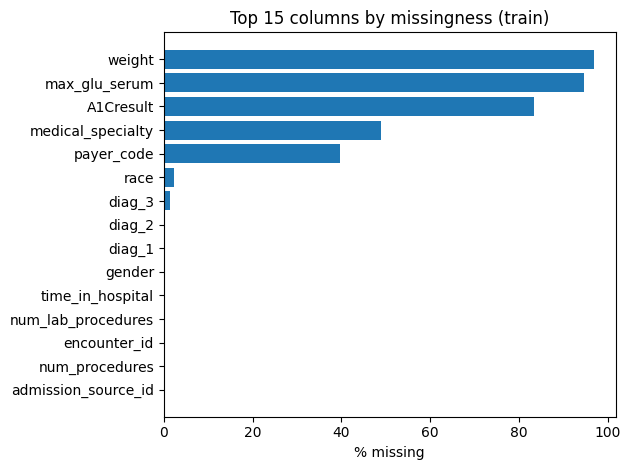

In [15]:
import matplotlib.pyplot as plt

top15 = miss_tbl.head(15).sort_values("missing_pct", ascending=True)

plt.figure()
plt.barh(top15.index.astype(str), top15["missing_pct"].values)
plt.xlabel("% missing")
plt.title("Top 15 columns by missingness (train)")
plt.tight_layout()
plt.show()

In [16]:
acceptable = miss_tbl[miss_tbl["missing_pct"] < 5].head(10)
problematic = miss_tbl[miss_tbl["missing_pct"] > 30].head(10)

acceptable, problematic

(                     missing_count  missing_pct
 race                          1471     2.262972
 diag_3                         904     1.390705
 diag_2                         218     0.335369
 diag_1                          13     0.019999
 gender                           2     0.003077
 encounter_id                     0     0.000000
 time_in_hospital                 0     0.000000
 admission_source_id              0     0.000000
 num_procedures                   0     0.000000
 num_lab_procedures               0     0.000000,
                    missing_count  missing_pct
 weight                     63018    96.946295
 max_glu_serum              61584    94.740243
 A1Cresult                  54211    83.397689
 medical_specialty          31809    48.934665
 payer_code                 25733    39.587404)

Most columns have little or no missingness. A few variables have moderate missingness (race, diagnoses), but are still under 5% and likely safe to keep.

In contrast, a small set of columns have very high missingness: weight is missing in around 97% of samples, and lab summary fields like max_glu_serum and A1Cresult are missing in most encounters

**Recommendation:** I will likely drop weight, and for lab-result features I will consider keeping them but encoding missingness explicitly (e.g., “not measured”) rather than trying to impute numeric values. specifically I will recommmend, but not act on the recommendations yet!!!!

1- race (2.26% missing): keep variable, and fill missing with a simple “Missing” category.

2- diag_3 (1.39% missing): keep; low missingness, fill missing with “Missing/Unknown diagnosis”

3- diag_2 (0.34% missing): keep; same approach as diag_3.

4- weight (96.95% missing): drop (too sparse to be reliable), can't impute

5- max_glu_serum (94.74% missing): Drop, too sparce to be reliable, can't impute

6- A1Cresult (83.40% missing):Keep variable, treat missing as informativ... perhaps screening for diabetes was not universal.. will do a “not measured” category rather than imputation.

7- Medical_specialty 48.93% and payer_code 39.59% are high-missing and will be handled as “Unknown” category .. I don't recommend dropping the whole variable

**Task 3: Is missingness related to outcome?**


This question will help us decide what to do with the missing data. Because if the missing data is not random, and therefore, having a patient with missing weight for example is associated with readmission, then we should be more careful managing the missingness. Same goes to the other two I picked: A1c, and payer.  

In [17]:

cols = ["weight", "A1Cresult", "payer_code"]
outcome_col = "readmit30"

for col in cols:
    is_miss = df[col].isna().astype(int)

    rate_missing = df.loc[is_miss == 1, outcome_col].mean()
    rate_not_missing = df.loc[is_miss == 0, outcome_col].mean()

    out_tbl = pd.DataFrame({
        "group": ["missing", "not_missing"],
        "readmit_rate": [rate_missing, rate_not_missing]
    })

    print("\n" + "="*50)
    print("Column:", col)
    print(out_tbl)



Column: weight
         group  readmit_rate
0      missing      0.111349
1  not_missing      0.120403

Column: A1Cresult
         group  readmit_rate
0      missing      0.114479
1  not_missing      0.097294

Column: payer_code
         group  readmit_rate
0      missing      0.115299
1  not_missing      0.109218


What I take from this is that:

weight: Readmission was slightly higher when weight was present (12.04%) vs missing (11.13%). The difference is small, and because weight is missing in around 97% of rows, the “not missing” group is perhaps a special subgroup...

A1Cresult: Readmission was higher when A1Cresult was missing (11.45%) vs not missing (9.73%). This suggests missingness may be informative (not MCAR).. maybe the test may be ordered selectively.. makes me want to recommend encoding “not measured/missing” explicitly and not do imputation.

payer_code: Readmission was slightly higher when payer_code was missing (11.53%) vs not missing (10.92%). The difference is small, so any association with outcome appears weak.. missingness may be closer to random, but could still reflect administrative workflow or patient subgroup differences (possible MAR).

Based on this expirement above, i will rewrite my recommendations to be as follows:

1- race (2.26% missing): keep variable, and fill missing with a simple “Missing” category.

2- diag_3 (1.39% missing): keep; low missingness, fill missing with “Missing/Unknown diagnosis”

3- diag_2 (0.34% missing): keep; same approach as diag_3.

4- weight (96.95% missing): drop (too sparse to be reliable), can't impute

5- max_glu_serum (94.74% missing): keep as categorical with filling in missing as "not_measured" category and decide later during modeling whether it helps.

6- A1Cresult (83.40% missing): Same as max_glu_serum

7- medical_specialty 48.93% and payer_code 39.59% are high-missing and will be handled as “Unknown” category .. I don't recommend dropping the whole variable

**Task 4: Minimal data quality checks**

Let us start with checking for duplicated rows and repeated IDs (encounter/patient)

In [18]:

dup_rows = df.duplicated().sum()
print("Duplicate rows:", dup_rows)

id_cols = [c for c in ["encounter_id", "patient_nbr", "row_id"] if c in df.columns]
print("ID columns found:", id_cols)

for c in id_cols:
    vc = df[c].value_counts()
    repeated = vc[vc > 1].head(10)
    print("\nTop repeated IDs for:", c)
    if len(repeated) == 0:
        print("  None (no repeats found)")
    else:
        print(repeated)


Duplicate rows: 0
ID columns found: ['encounter_id', 'patient_nbr', 'row_id']

Top repeated IDs for: encounter_id
  None (no repeats found)

Top repeated IDs for: patient_nbr
patient_nbr
88785891    40
88227540    23
1660293     23
23643405    22
84428613    22
29903877    20
89472402    20
88789707    20
88681950    19
97391007    19
Name: count, dtype: int64

Top repeated IDs for: row_id
  None (no repeats found)


There are duplicate patient numbers, and this is expected, becauase encounters are the unit of analysis, and some patients will have many hospitalizations, and I should be mindful about patient-level leakage moving forward.

Good things is that there are no encounter ID duplications.

Next is to check basic validity/outliers for three numeric columns using percentiles (1st/99th) plus min/median/max, and  visualize their distributions with one figure (3 histograms)

In [19]:
cols_num = ["time_in_hospital", "num_lab_procedures", "num_medications"]

rows = []
for col in cols_num:
    s = df[col].dropna()
    rows.append({
        "column": col,
        "min": s.min(),
        "p1": np.percentile(s, 1),
        "median": s.median(),
        "p99": np.percentile(s, 99),
        "max": s.max()
    })

outlier_summary = pd.DataFrame(rows)
outlier_summary


,column,min,p1,median,p99,max
0,time_in_hospital,1,1.0,4.0,13.0,14
1,num_lab_procedures,1,1.0,44.0,85.0,129
2,num_medications,1,3.0,15.0,43.0,81


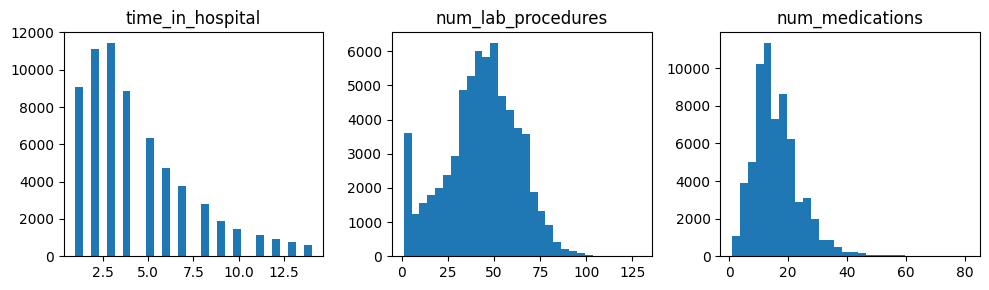

In [20]:
plt.figure(figsize=(10, 3))
for i, col in enumerate(cols_num, start=1):
    plt.subplot(1, 3, i)
    s = df[col].dropna()
    plt.hist(s.values, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()


**2 candidate leakage columns and justifications:**


*   Discharge_disposition_id: This shows the discharge distentation... which is post-discharge info. Also, it is closely linked to severity, and potentially can indicate risk of readmission, therefore, could behave like leakage.

*   Number_inpatient (or number_emergency / number_outpatient): these represent prior care utilization and can be strongly associated with readmission!!  They can act like a proxy for a patient’s baseline risk and past readmission behavior, so it’s worth flagging and making sure it’s defined as history before the index encounter.





**Final summary**

* Dataset has 0 duplicate rows, and encounter_id is unique (no repeats), and row_id is also unique.. both behave like row/encounter identifiers.

* patient_nbr repeats (for example one patient appears 40 times in the top repeated list), consistent with multiple encounters per patient and a reason to be careful about patient-level leakage across splits.

* Top 5 missing columns (in the train dataset): weight 96.95%, max_glu_serum 94.74%, A1Cresult 83.40%, medical_specialty 48.93%, payer_code 39.59%.

* Missingness appears associated with readmission for at least one variable: A1Cresult had higher readmission when missing (11.45%) vs not missing (9.73%), suggesting missingness may be informative (and not completely random).

* For payer_code, the difference was small (missing 11.53% vs not missing 10.92%), suggesting any association is weak and could reflect administrative workflow differences (possible MAR).

* For weight, readmission was slightly higher when not missing (12.04%) vs missing (11.13%), but since weight is missing in around 97% of rows, the non-missing group likely represents a special subgroup.

* Numeric validity/outliers looked plausible: time_in_hospital ranged 1–14 days (median 4, p99 13).

* num_lab_procedures (median 44, p99 85, max 129) and num_medications (median 15, p99 43, max 81) were right-skewed with long tails, but no obvious impossible values.

**EDA-driven next steps:**

* Step 1: drop weight due to extreme missingness and low practical usefulness.

* Step 2: keep lab features (max_glu_serum, A1Cresult) and encode missingness explicitly as “not_measured” (and no imputation), because missingness may carry signal.

* Step 3: keep medical_specialty and payer_code, treating missing as “Unknown”

**For leakage handling:**

* Drop discharge_disposition_id and keep utilization-history features like number_inpatient (and/or number_emergency, number_outpatient) as pre-index risk signals.

**FIGURES and TABLES:**

**Missingness:**

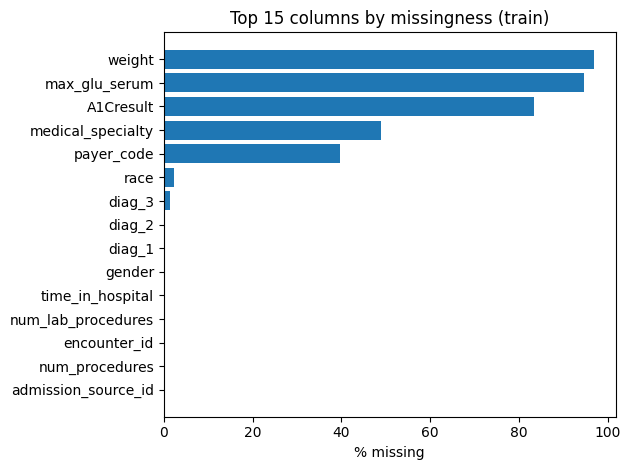

In [21]:

top15 = miss_tbl.head(15).sort_values("missing_pct", ascending=True)

plt.figure()
plt.barh(top15.index.astype(str), top15["missing_pct"].values)
plt.xlabel("% missing")
plt.title("Top 15 columns by missingness (train)")
plt.tight_layout()
plt.show()

**Numeric distribution plot**

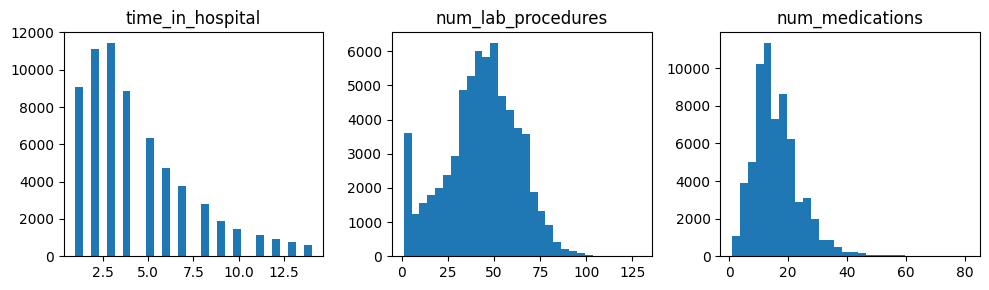

In [22]:
plt.figure(figsize=(10, 3))
for i, col in enumerate(cols_num, start=1):
    plt.subplot(1, 3, i)
    s = df[col].dropna()
    plt.hist(s.values, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()


**Missingness-vs-outcome plot/table for 3 columns**

In [23]:

cols = ["weight", "A1Cresult", "payer_code"]
outcome_col = "readmit30"

rows = []
for col in cols:
    is_miss = df[col].isna()
    rate_missing = df.loc[is_miss, outcome_col].mean()
    rate_not_missing = df.loc[~is_miss, outcome_col].mean()

    rows.append({
        "column": col,
        "readmit_rate_missing": rate_missing,
        "readmit_rate_not_missing": rate_not_missing,
        "diff_missing_minus_not": rate_missing - rate_not_missing
    })

miss_outcome_tbl = pd.DataFrame(rows)

miss_outcome_tbl_style = miss_outcome_tbl.style.format({
    "readmit_rate_missing": "{:.2%}",
    "readmit_rate_not_missing": "{:.2%}",
    "diff_missing_minus_not": "{:+.2%}"
})

miss_outcome_tbl_style


,column,readmit_rate_missing,readmit_rate_not_missing,diff_missing_minus_not
0,weight,11.13%,12.04%,-0.91%
1,A1Cresult,11.45%,9.73%,+1.72%
2,payer_code,11.53%,10.92%,+0.61%


#MAINEND

## 5) Validate the predictions file format

This checks:
- required columns
- probabilities in [0, 1]
- row_ids match the test file

It assumes the submission notebook wrote `predictions.csv` in the repo root.


## 6) Commit + push + tag

You will:
- add changes
- commit (pre-commit hook runs here)
- push
- tag a milestone (example: `milestone_wk3`) and push tags



You will need a Personal Access Token (PAT) for the following step. See instructions above.

In [24]:
import getpass, subprocess

# TODO: Update with your Github credentials
# ========= USER-EDITABLE SETTINGS (change only these) =========
GIT_AUTHOR_NAME   = "Timothy Kline"             # shows in commits
GIT_AUTHOR_EMAIL  = "kline.timothy@gmail.com"   # shows in commits
GITHUB_USERNAME   = "tlkline"                   # GitHub login for auth
# =============================================================

# Identity
subprocess.run(["git", "config", "--global", "user.name", GIT_AUTHOR_NAME], check=True)
subprocess.run(["git", "config", "--global", "user.email", GIT_AUTHOR_EMAIL], check=True)

# Use the plain "store" helper (persists for the *runtime*, not your local machine)
subprocess.run(["git", "config", "--global", "credential.helper", "store"], check=True)

token = getpass.getpass("GitHub PAT: ").strip()

# Approve credentials for github.com
cred_input = (
    "protocol=https\n"
    "host=github.com\n"
    f"username={GITHUB_USERNAME}\n"
    f"password={token}\n\n"
)
subprocess.run(["git", "credential", "approve"], input=cred_input.encode(), check=True)

# Quick auth test (doesn't modify anything)
subprocess.run(["git", "ls-remote", "origin", "-h"], check=True)

print("Auth looks good. Now you can: git push")

# Commit and push
!pre-commit run --all-files
!git add -A
# Run one more time to force the changes and push
!pre-commit run --all-files
!git add -A
!git commit -m "Assignment 1: workflow + initial submission notebook"
!git push

TAG = "checking_workflow_007"
!git tag -a {TAG} -m "Checking workflow 007"
!git push --tags
print("Tagged and pushed:", TAG)

GitHub PAT: ··········
Auth looks good. Now you can: git push
[INFO] Initializing environment for https://github.com/kynan/nbstripout.
[INFO] Installing environment for https://github.com/kynan/nbstripout.
[INFO] Once installed this environment will be reused.
[INFO] This may take a few minutes...
nbstripout...............................................................Failed
- hook id: nbstripout
- files were modified by this hook
nbstripout...............................................................Passed
nbstripout...............................................................Passed
[main 2824a33] Assignment 1: workflow + initial submission notebook
 1 file changed, 898 insertions(+), 1749 deletions(-)
 rewrite Project-1/readmit30/notebooks/Assignment1_Colab_Workflow.ipynb (89%)
remote: Permission to TLKline/AIHC-5010-Winter-2026.git denied to Mughrabi9494.
fatal: unable to access 'https://github.com/TLKline/AIHC-5010-Winter-2026.git/': The requested URL returned error: 403
fatal

## Done ✅

If you hit issues:
- Make sure you pulled the latest course template (missing files).
- Make sure `data/public/*` exists in your repo (or your instructor provided it separately).
